<h1 align="center">Assignment</h1>
<h3 align="center">Faisal Akhtar</h3>
<h3 align="center">Roll No.: 17/1409</h3>
<p>Machine Learning - B.Sc. Hons Computer Science - VIth Semester</p>
<p>Using stochastic gradient descent in neural networks, predict the values of house prices using Boston dataset.</p>

In [1]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

In [2]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [3]:
# data overview
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [4]:
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 13)
(506,)
(354, 13)
(152, 13)
(354,)
(152,)


In [5]:
## Before standardizing data
x_train

array([[1.13290e-01, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
        3.91250e+02, 1.13800e+01],
       [4.26131e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.90740e+02, 1.26700e+01],
       [2.10380e-01, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
        3.96900e+02, 4.85000e+00],
       ...,
       [2.77974e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.96900e+02, 2.92900e+01],
       [1.88360e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.41500e+01],
       [3.25430e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.96900e+02, 1.53900e+01]])

In [6]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [7]:
## After standardizing data
x_train
x_test

array([[-0.38013482,  0.45039666, -0.66272603, ...,  0.04913236,
         0.36743689,  0.03930751],
       [-0.32326475, -0.46553279, -0.49194526, ...,  1.15052691,
        -0.5387094 ,  0.52943455],
       [-0.34698845, -0.46553279, -0.77272042, ..., -0.50156491,
         0.45514904, -0.71473408],
       ...,
       [ 1.09414446, -0.46553279,  0.9495602 , ...,  0.78339539,
         0.20019905,  2.4997173 ],
       [-0.40449721, -0.46553279, -1.20111964, ..., -0.73102211,
         0.22454582, -0.75103978],
       [ 0.07657899, -0.46553279,  0.9495602 , ...,  0.78339539,
         0.21891097, -0.14780651]])

In [8]:
## Adding the PRICE Column in the data
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.399660,0.908361,-0.956527,-0.287348,-1.160352,0.875794,-0.569320,1.332664,-0.432881,-0.661504,-0.868696,0.395080,-0.186905,22.0
1,0.036075,-0.465533,0.949560,-0.287348,1.837136,-0.264096,0.413621,-0.582867,1.608805,1.488429,0.783395,0.389657,-0.006773,22.6
2,-0.389461,0.450397,-1.188094,-0.287348,-1.029760,0.752367,-1.373876,0.213777,-0.546308,-1.154931,-1.648851,0.455149,-1.098737,35.1


In [9]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [10]:
type(x_test)

numpy.ndarray

In [11]:
n_iter=100

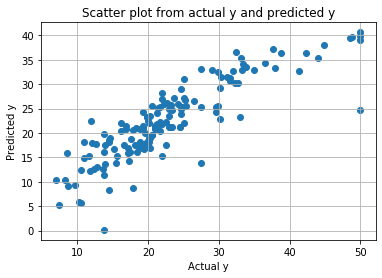

In [12]:
# SkLearn SGD classifier
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [13]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

Mean Squared Error : 21.59467548160897


In [14]:
# SkLearn SGD classifier predicted weight matrix
sklearn_w=clf_.coef_
sklearn_w

array([-0.92589156,  0.43723733, -0.31598749,  1.09709883, -2.09688264,
        2.68223287, -0.194221  , -2.90708156,  1.48276007, -0.64474994,
       -1.83674577,  0.68499033, -3.8103472 ])

In [15]:
type(sklearn_w)

numpy.ndarray